### LAB 2

Filippo Cucchetto 2110510


### EX.1


1)Write the R functions for the probability density and cumulative distribution functions, using the R naming convention.

In [25]:
dpois_=function(lambda,k){
    j=1
    d=list()
    for(i in k){
    d[[j]]=((lambda^i)*exp(-lambda))/((factorial(i))*(1-exp(-lambda)))
    j=j+1
    }
return(unlist(d))
}

ppois_=function(lambda,a){
    j=1
    s=list()
    for(i in a){
        t=seq(1,i)
        s[[j]]=sum(dpois_(lambda,t))
        j=j+1
    }
    return(unlist(s))
}

2) Produce two plots showing the pdf and cdf, separately

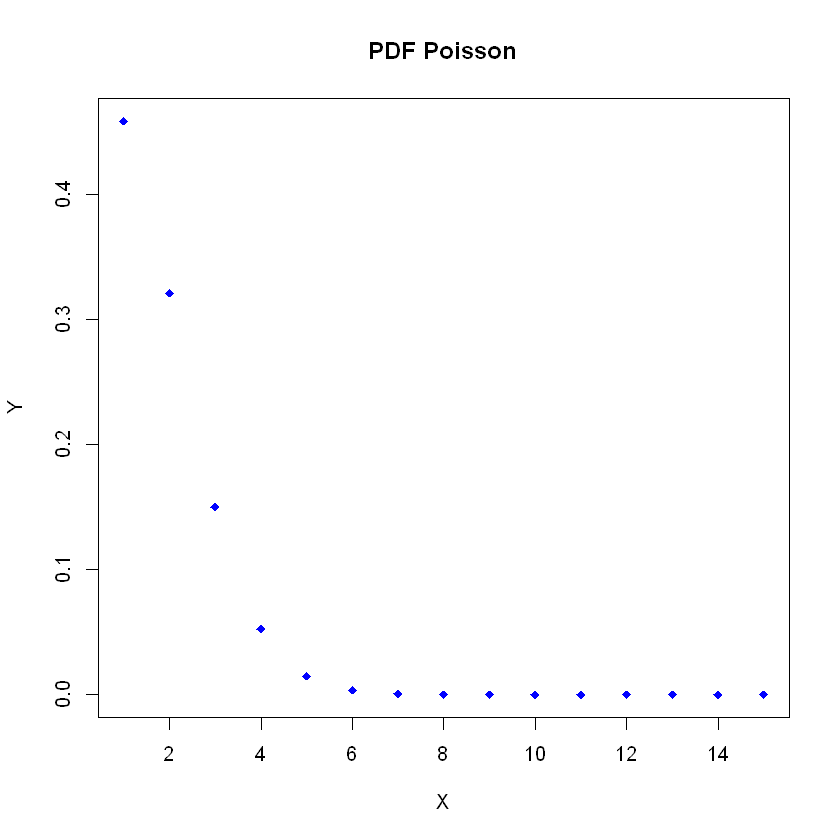

In [26]:
vec=seq(1,15)
plot(vec,dpois_(1.4,vec),main="PDF Poisson",xlab="X",ylab="Y",pch=18,col="blue")

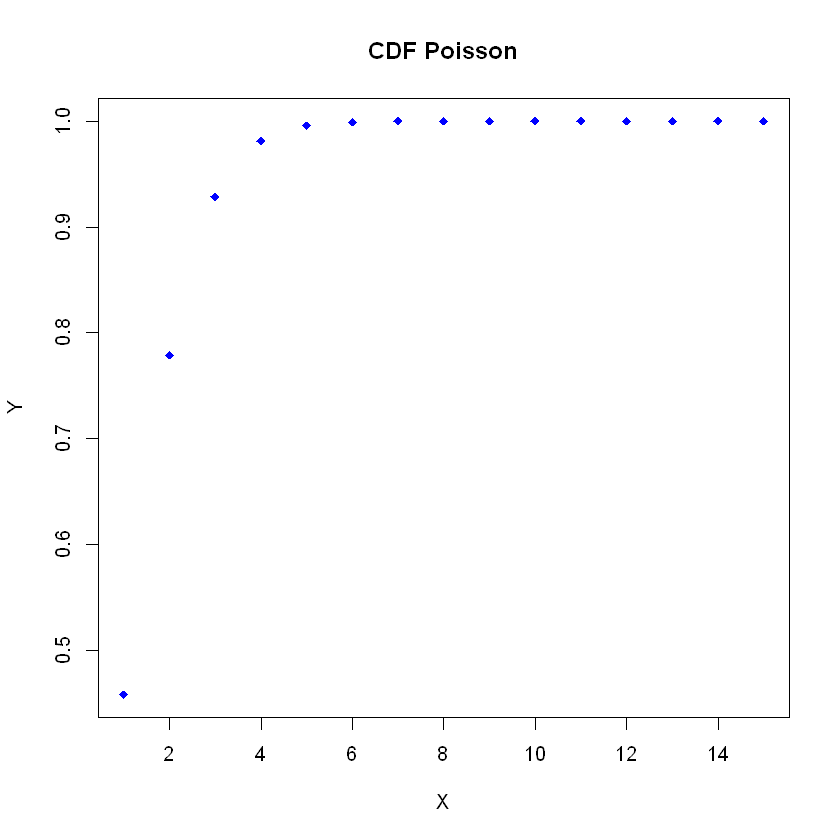

In [27]:
plot(vec,ppois_(1.4,vec),main="CDF Poisson",xlab="X",ylab="Y",pch=18,col="blue")

3) Compute the mean value and variance of the probability distribution using R

In [28]:
vec_2=vec*vec
variance=sum(vec_2*dpois_(1.4,vec))-((sum(vec*dpois_(1.4,vec))^2))

cat("The mean of the distribution is",sum(vec*dpois_(1.4,vec)),"\n")
cat("The variance of the distribution is",variance,"\n")


The mean of the distribution is 1.858235 
The variance of the distribution is 1.006726 


4) Generate a sample of random numbers from this distribution and show them in an histogram.
Evaluate the sample mean.

In [29]:
lambda=1.4
data_poisson=function(lambda) {
    k=1
    t=dpois_(lambda,k)
    s=t
    u=runif(1)

    while (s < u) {
        k=k + 1
        t=t*lambda / k
        s=s + t
    }
    
    return(k)
}



In [30]:
data=list()
for(i in 1:10000 ){
    data[[i]]=data_poisson(lambda)
}

In [31]:
data=as.data.frame(table(unlist(data)))
colnames(data)[1]="Number"

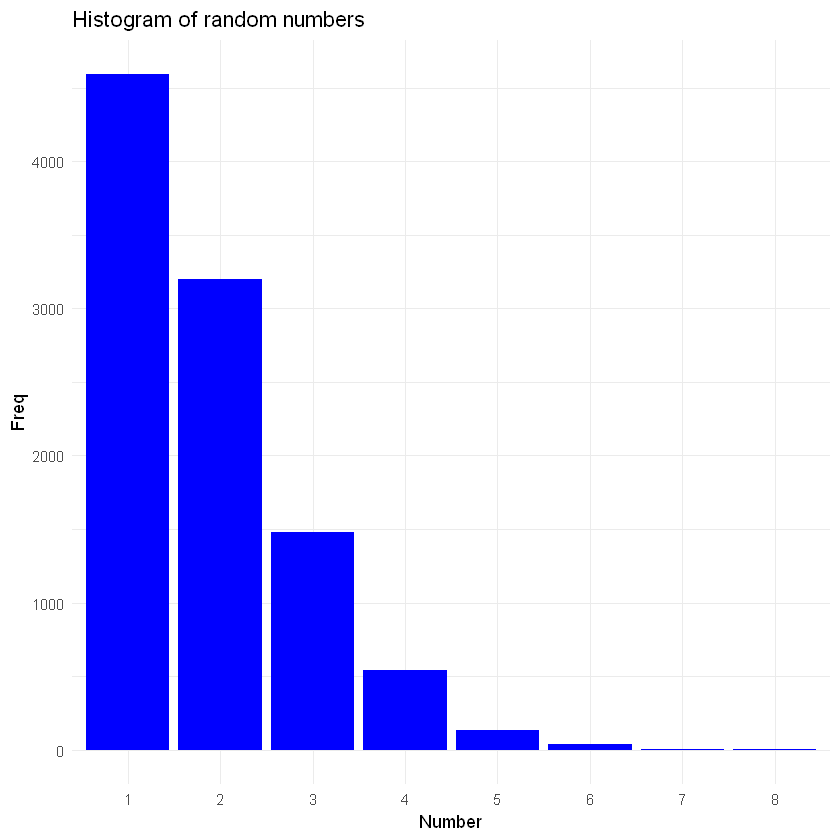

In [32]:
library(ggplot2)
a=ggplot(data=data, aes(x=Number, y=Freq)) +
  geom_bar(stat="identity",fill = "blue")+ theme_minimal()+ggtitle("Histogram of random numbers")
  a

### EX.2

a) Compute the normalisation factor N using R.

In [33]:
CR_muon=function(x){
    E_0=7.5
    gamma=2.7
    if(x>=E_0){
        return((x-E_0+1)^(-gamma))
        }
        else{
            return(1)
        }
    }


In [34]:
I=(unlist(integrate(Vectorize(CR_muon),0,Inf)))[[1]]
N=1/I
cat("The normalisation factor is:",N,"\n")

The normalisation factor is: 0.1236364 


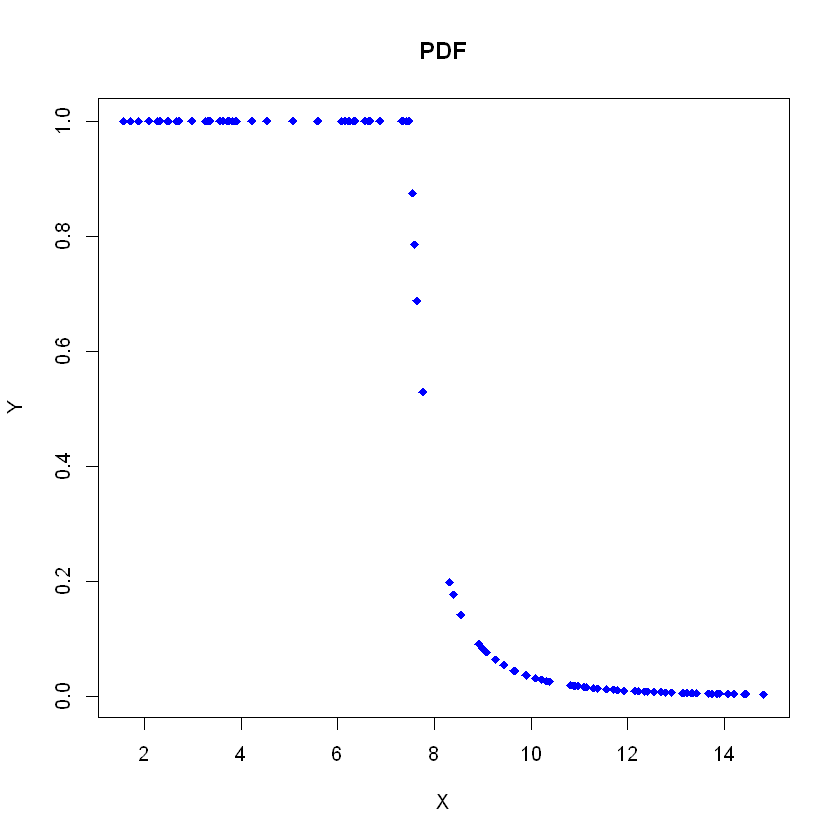

In [35]:
y=list()
x=list()
z=list()
for(i in 1:100){
    x[[i]]=runif(1,1,15)
    y[[i]]=CR_muon(x[[i]])
    z[[i]]=(unlist(integrate(Vectorize(CR_muon),0,i)))[[1]]
}
plot((unlist(x)),(unlist(y)),main="PDF",xlab="X",ylab="Y",pch=18,col="blue")

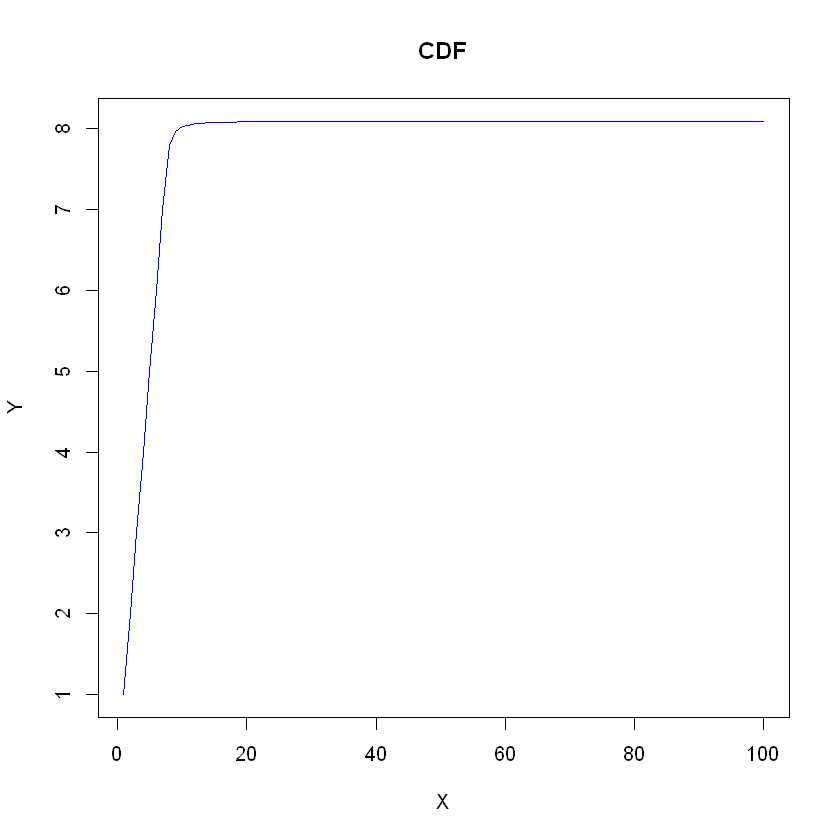

In [36]:
plot(seq(1:100),unlist(z),main="CDF",xlab="X",ylab="Y",pch=18,col="blue",type="l")

In [37]:
mean_CR_muon=function(x){
    E_0=7.5
    gamma=2.7
    if(x>=E_0){
        return((x-E_0+1)^(-gamma)*x)
        }
        else{
            return(1*x)
        }
}

cat("The mean values is",unlist((integrate(Vectorize(mean_CR_muon),0,Inf))[[1]]),"\n")

The mean values is 33.37708 


### EX.3

3a) Using Markov’s inequality, find a bound for the probability that at least five accidents will occur
tomorrow

From Markov's inequality, I get an upper bound on the probability that 5 of more accidents happens in one day.

In [38]:
mu=2
k=5
p=mu*(k^-1)
cat("The probability of having at least 5 incidents is lesser or equal to:",p,"\n")

The probability of having at least 5 incidents is lesser or equal to: 0.4 


3b) Using Poisson random variables, calculate the probability that at least five accidents will occur
tomorrow.

In [39]:
x=0:100
ap=dpois(x,mu)
p_4=sum(ap[x<=4])

cat("The probability of having at least 5 incidents is equal to:",1-p_4,"\n")

The probability of having at least 5 incidents is equal to: 0.05265302 


To get an the probability of having at least 5 incidents, given the fact that the average is 2, I set k=3, in this way using Chebyshev inequality I compute the requested probability.

In [40]:
p_cheb=2/9 
cat("The probability of having at least 5 incidents is lesser or equal to:",p_cheb,"\n")

The probability of having at least 5 incidents is lesser or equal to: 0.2222222 


### EX 4

We ask that the probability p(0<x<n)=95%. Where n is the time necessary for the delivery.

Now we know that p(0<x<n)=p(|x-7|<2n)=1-p(|x-7|>2n)=95%.

Using chebyshev's inequality.

p(|x-7|>2n)=<1/n^2, so 1-1/n^2<1-p(|x-7|>2n)=95% => 5%<1/(n^2), so if Helen wants to be certain of the arrival must be that  n = sqrt(1/0.05).

The maximum delay is given by z=7+2*n= 15 days.

In [41]:
cat("n equals to ",(sqrt(1/0.05)),"\n")
cat("Helen must wait at least",7+round(2*((sqrt(1/0.05)))),"days","\n")

n equals to  4.472136 
Helen must wait at least 16 days 


### EX.5

I need to compute the mean and variance of the distribution of pairs in order to compute  the probability.

In [42]:
gen_samples=function(){
cards=c(rep(0,26),rep(1,26)) #assuming the deck is divided in equally between red and blacks
pairs=0
cards=sample(cards)

for(i in 1:26){
    a=sample(cards,1)
    b=sample(cards,1)
    if((a+b)==1){
        pairs=pairs+1
    }
    else {
        pairs=pairs
    }
   
}
 return(pairs)
}

In [43]:
Num_samples=1000
data=list()
for(i in 1:Num_samples){
    data[[i]]=gen_samples()
}
mu=round(mean((unlist(data))))
var=var(unlist(data))
t=(10-mu)/sqrt(var)
p=1/t^2

cat("the probability of having at most 11 pairs is ",p,"w.r.t mu=",mu,"var=",var,"\n")

the probability of having at most 11 pairs is  0.7079069 w.r.t mu= 13 var= 6.371162 


### EX.6

a)


In [44]:
lam=2 # average passenger per minute

cat('The probability of having more of 6 passenger after 2 min is',1-ppois(6,lam*2), '\n')
cat('The probability of having less than 4 passenger after 3 min is',ppois(3,lam*3), '\n')

The probability of having more of 6 passenger after 2 min is 0.110674 
The probability of having less than 4 passenger after 3 min is 0.1512039 


b)

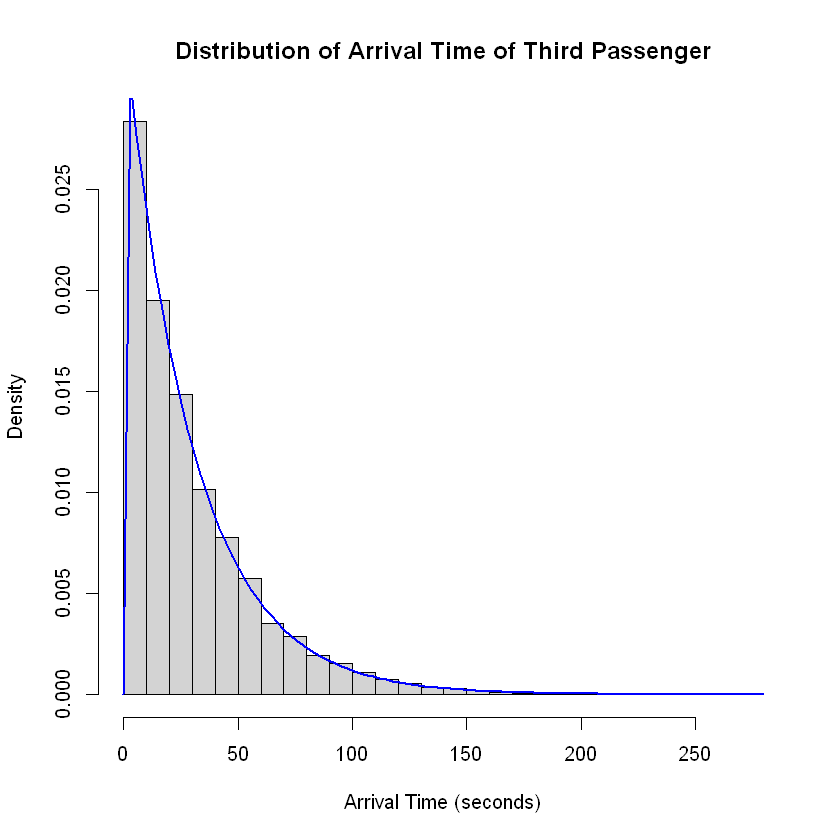

In [52]:
lambda=1/30
num_simulations=10000 

sarrival_times=function(lambda, npassengers) { # I create a function to simulate data from the exponential
  arrival_times=npassengers
  for (i in 1:npassengers) {
    arrival_times[i]=rexp(1, lambda)
  }
  return(arrival_times)
}

arrival_times=replicate(num_simulations, sarrival_times(lambda, 3))

hist(arrival_times[3, ], breaks = 20, freq = FALSE, main = "Distribution of Arrival Time of Third Passenger",
     xlab = "Arrival Time (seconds)", ylab = "Density")

curve(dexp(x, lambda), col = "blue", add = TRUE, lwd = 2)

In [2]:
N_sampling=10000
dt=0.01
Dt=15
lam=2
N_passeng=5
samples=rep(0, N_sampling)
for(i in 1:N_sampling){
  timeline=rep(0, Dt/dt)
  t=0
  while(sum(timeline)<N_passeng & t<=Dt/dt){
    t=t+1
    timeline[t] <- rpois(1, lambda = lam*dt)
  }
  samples[i]<-(t- which(timeline != 0)[1])*dt
}

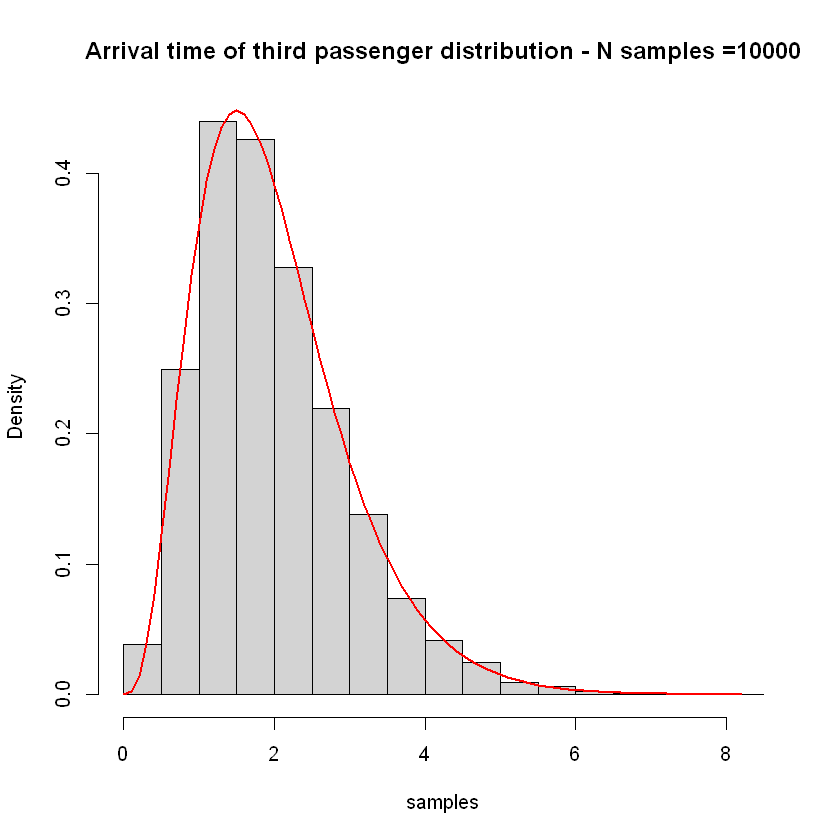

In [3]:
hist(samples, main='Arrival time of third passenger distribution - N samples =10000', freq=FALSE)
theoretical_probs <- function(q) {dgamma(q, shape=4, rate = lam)}
q=seq(0, max(samples), 0.1)
lines(q, theoretical_probs(q), col = "red", lwd = 2)

c)

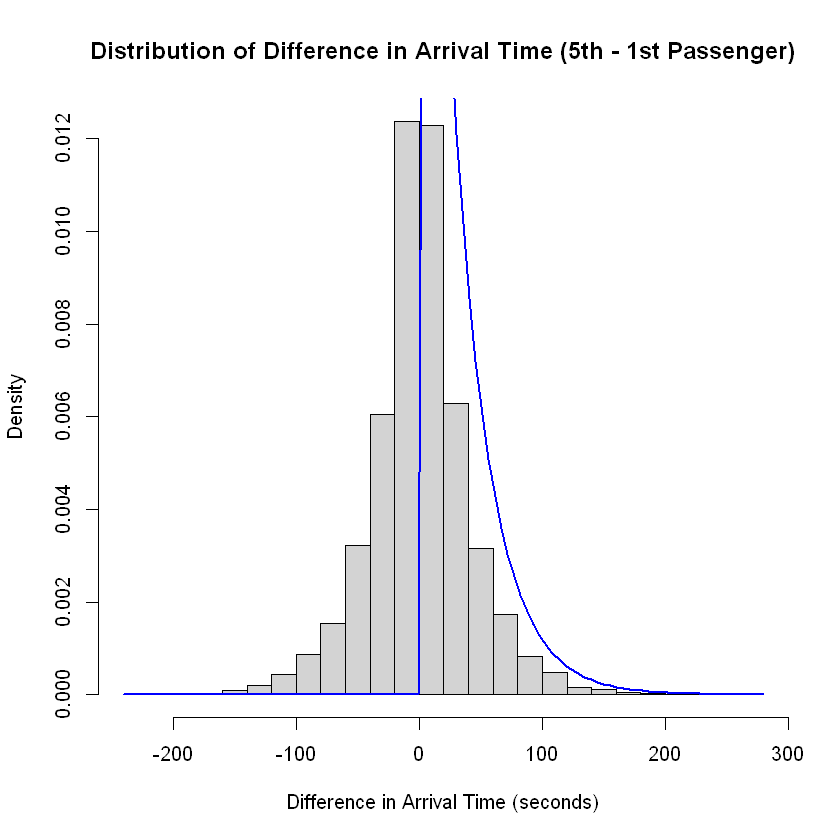

In [53]:
arrival_times=replicate(num_simulations, sarrival_times(lambda, 5))

difference_times=arrival_times[5, ] - arrival_times[1, ]

hist(difference_times, breaks = 20, freq = FALSE, main = "Distribution of Difference in Arrival Time (5th - 1st Passenger)",
     xlab = "Difference in Arrival Time (seconds)", ylab = "Density")

curve(dexp(x, lambda), col = "blue", add = TRUE, lwd = 2)